In [1]:
#Plot Jaz current vs time from sense resistor. I downloaded CurrentVsPressure400hz250VppSinWave10k3.lvm
#Then I renamed it to .txt so I could peep it in TextEdit-- no other changes
#Original data in LabView lvm files looks like a tab delimited text file

SenseResistance=100 #Sense resistor value in ohms. 
#This resistor is in series between the ICEO cell and ground. 
#The voltage that develops across it is proportional to the current through the ICEO cell.

#now bring in the data and create variables for plots
import numpy as np
ICEOData= np.loadtxt('CurrentVsPressure400hz250VppSinWave10k3.txt', delimiter='\t') 
Timebase=ICEOData[:,0]#Going ahead and assuming timebase in seconds. 
#Turns out to be consistent w the 400 Hz signal and with the overall 10 minute length.
PressureData=ICEOData[:,1] #Assuming the rest of data is in volts
CurrentData=[CurrentDatum/SenseResistance for CurrentDatum in ICEOData[:,2]] #Puts current into units of amperes
VoltageData=[50*2*VoltageDatum for VoltageDatum in ICEOData[:,3]]#Assumes 2x voltage divider, and 50x trek gain, and ignores voltage drop across sense resistor


In [2]:
Timebase[0:10],PressureData[0:10],CurrentData[0:10],VoltageData[0:10] #check out what this data looks like
len(Timebase)

352000

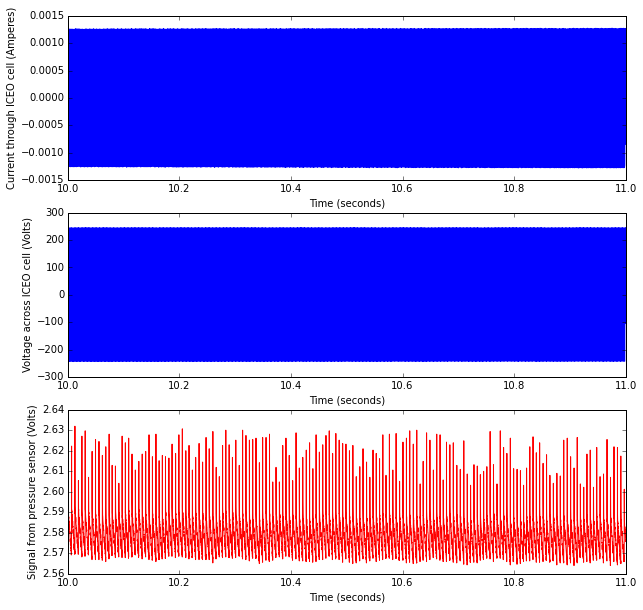

In [5]:
#plot all the data
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(Timebase[100000:110000],CurrentData[100000:110000])
plt.hold('True')

plt.xlabel('Time (seconds)')
plt.ylabel('Current through ICEO cell (Amperes)')

plt.subplot(3,1,2)
plt.plot(Timebase[100000:110000],VoltageData[100000:110000])#voltage data should go in a different subplot
#with a different y axis label
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage across ICEO cell (Volts)')

plt.subplot(3,1,3)
plt.plot(Timebase[100000:110000],PressureData[100000:110000],'r-')#pressure data should go in a different subplot
#with a different y axis label
plt.xlabel('Time (seconds)')
plt.ylabel('Signal from pressure sensor (Volts)')

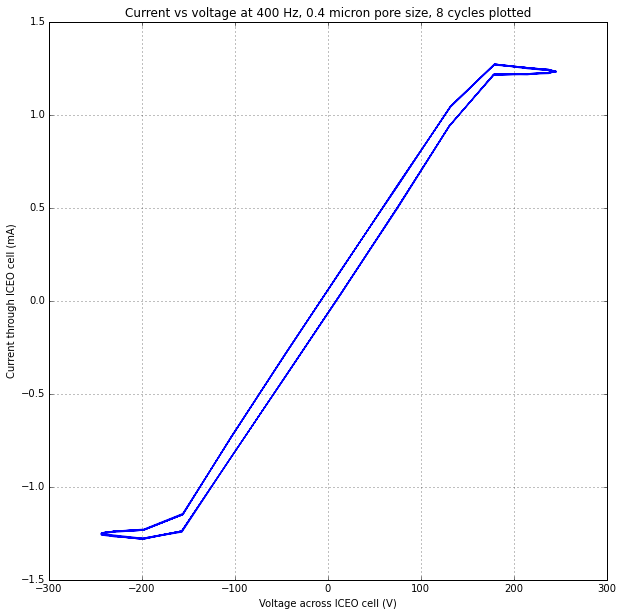

In [21]:
#how about a IV plot using a few cycles
plt.figure (figsize=(10,10))
plt.plot(np.array(VoltageData[110000:110200]),1000*np.array(CurrentData[110000:110200]))#plotting in milliamps
plt.title('Current vs voltage at 400 Hz, 0.4 micron pore size, 8 cycles plotted')
plt.xlabel('Voltage across ICEO cell (V)')
plt.ylabel('Current through ICEO cell (mA)')
plt.grid('on')


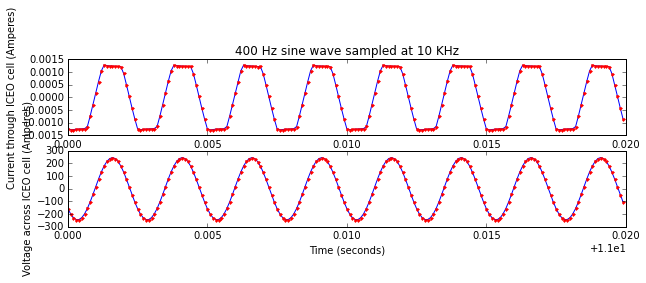

In [14]:
#plot just a short period of the current and voltage data to see the 400 Hz square wave
plt.figure(figsize=(10,3))
plt.subplot(2,1,1)
plt.plot(Timebase[110000:110200],CurrentData[110000:110200])
plt.hold('True')
plt.plot(Timebase[110000:110200],CurrentData[110000:110200],'r.')
plt.xlabel('Time (seconds)')
plt.ylabel('Current through ICEO cell (Amperes)')
plt.title('400 Hz sine wave sampled at 10 KHz')

plt.subplot(2,1,2)
plt.plot(Timebase[110000:110200],VoltageData[110000:110200])
plt.hold('True')
plt.plot(Timebase[110000:110200],VoltageData[110000:110200],'r.')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage across ICEO cell (Amperes)')


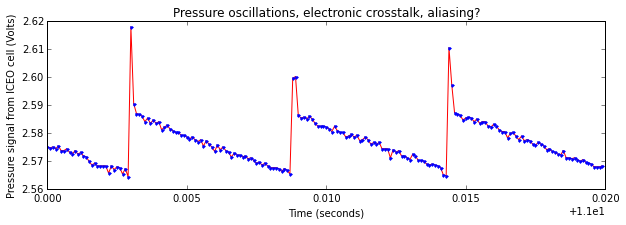

In [8]:
#what is the pressure doing during the same time???
plt.figure(figsize=(10,3))
plt.plot(Timebase[110000:110200],PressureData[110000:110200],'r')
plt.hold('True')
plt.plot(Timebase[110000:110200],PressureData[110000:110200],'b.')

plt.xlabel('Time (seconds)')
plt.ylabel('Pressure signal from ICEO cell (Volts)')
plt.title('Pressure oscillations, electronic crosstalk, aliasing?')


In [36]:
#The sense resistor is working well here at 250V pp. 
#Why is the current hitting a wall at about 1.25 mA? Is this a limit to the current the Trek can produce?
#Does this maximum change if you increase the frequency?
#The IV curve has an opening at 0,0. This could have come about because of capacitance. It should depend on the scan rae.

#We should use a triangle wave
#https://web.nmsu.edu/~snsm/classes/chem435/Lab13/intro.html

#Jaz recently (3/10/17) added a voltage measurement using a voltage divider to drop the voltage to something LabView could measure.
#We got new information, you are sending approx 1 Watt into the system at peak times ( 250V * 0.004A)
#and now can talk about efficiency of conversion from electrical to mechanical power

#It would be interesting to compare IV with metal, to IV curve without metal or to double sided metal.

#Are the pressure oscillations real? If it's getting rectified because of the ICEO effect, 
#it should be dropping at the edges of the square wave when ions are rearranging, 
#and increasing both when the square wave is negative and positive. 
#That would mean a pressure signal oscillating at 800 Hz. It's too fast to be spotted
#with a 1000 Hz sampling frequency so would appear as a lower frequency signal (aliasing)
#Also possible: rapid high voltage switching at squarewave edges can cause inductive pickup
#at the pressure sensor. This electronic crosstalk could add high frequency noise to your signal 
#that isn't originating from pressure in the ICEO cell. 

#UPDATE: the higher 10kHz sampling rate showed that the pressure oscillation signal isn't aliasing to look like a
#lower frequency. It's not really synced with the triangle wave from the function gen, either. Why is it a sawtooth? Does the sawtooth
#frequency change with function generator frequency? Figuring this out would explain the pressure "noise"
#which we have been averaging out since the first experiments. Does the P-sensor datasheet have any explanations?

#Lower voltages may produce smaller currents, harder to measure-- if we start to see the digital levels of the
#LabView system it means we must amplify the current signal before collecting data with LabView
